In [17]:
import numpy as np
import time
import itertools
import pandas as pd
import math
import pygad

def eca_get_lut(rule_num):
  return np.array([int(x) for x in bin(rule_num)[2:].zfill(32)], dtype=np.uint8)

def eca_evolve(lut, x):
  return lut[31 - (np.roll(x, 2) * 16 + np.roll(x, 1) * 8 + x * 4 + 2 * np.roll(x, -1) + np.roll(x, -2))]

def eca_steps(rule, config, steps):
    current_config = config
    for step in range(steps):
        current_config = eca_evolve(rule, current_config)
    return current_config

def DCP(rule, configuration, time):
    n = configuration.shape[0]
    density = np.sum(configuration)/n
    limit = eca_steps(rule, configuration, time)
    sum = np.sum(limit)
    if density < 0.5:
        return (sum == 0)
    else:
        return (sum == 1)

def DCP_test(rule, combinations, time):
    evaluate = [DCP(rule, configuration, time) for configuration in combinations]
    result = evaluate.count(True)/combinations.shape[0]*100
    return result

def convert_configuration(configuration: bytes, N: int):
    binary_str = ''.join(f'{byte:08b}' for byte in configuration)
    return np.array([int(bit) for bit in binary_str[:N]])

def configuration_reader(file_name: str, N: int, negate: bool):
    bytes_per_configuration = math.ceil(N / 8)
    configurations = []

    with open(file_name, 'rb') as file:
        while True:
            bytes_read = file.read(bytes_per_configuration)
            if not bytes_read:
                break

            cfg = convert_configuration(bytes_read, N)
            configurations.append(cfg)
            
            if negate:
                configurations.append(1 - cfg)

    return np.stack(configurations)
    
def convert_configuration(configuration: bytes, N: int):
    binary_str = ''.join(f'{byte:08b}' for byte in configuration)
    return np.array([int(bit) for bit in binary_str[:N]])

def configuration_reader(file_name: str, N: int, negate: bool):
    bytes_per_configuration = math.ceil(N / 8)
    configurations = []

    with open(file_name, 'rb') as file:
        while True:
            bytes_read = file.read(bytes_per_configuration)
            if not bytes_read:
                break

            cfg = convert_configuration(bytes_read, N)
            configurations.append(cfg)
            
            if negate:
                configurations.append(1 - cfg)

    return np.stack(configurations)

In [18]:
def fitness_func(solution, solution_idx):
    fitness = DCP_test(solution, configurations, steps)
    return fitness

Parameters of the best solution : [1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0]
Fitness of best solution = 73.0
Number of generations =  50
1128.2187941074371


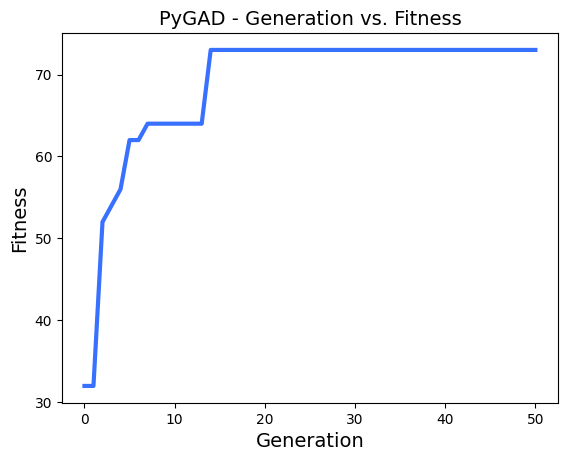

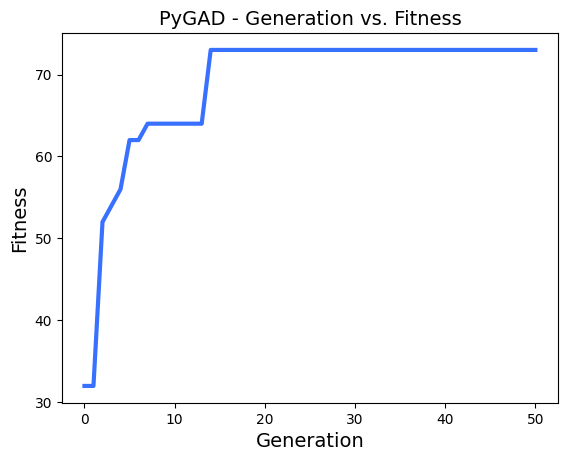

In [40]:
configurations = configuration_reader("ALL_N23.bin", 23, True)
configurations = configurations[:100]
steps = 46

gene_space = [0, 1]
num_genes = 32

sol_per_pop = 80
num_parents_mating = int(sol_per_pop * 0.3) #30% of the population
num_generations = 50
keep_parents = 2
parent_selection_type = "sss"
crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = 5

fitness_function = fitness_func

start = time.time()
ga_instance = pygad.GA(gene_space=gene_space, gene_type=int, num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, num_genes=num_genes, 
                       parent_selection_type=parent_selection_type, keep_parents=keep_parents, 
                       crossover_type=crossover_type, mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

ga_instance.run()


solution, solution_fitness, solution_idx = ga_instance.best_solution()
end = time.time()

print("Parameters of the best solution : {solution}".format(solution= solution))
print("Fitness of best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Number of generations = ", ga_instance.generations_completed)
print(end-start)
ga_instance.plot_fitness()

In [41]:
conf = configuration_reader("ALL_N23.bin", 23, True)

In [45]:
DCP_test(solution, conf, 46)

41.79105296059486